In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Torab al-ghoraba,1998
1,Long zai tian ya,1989
2,Jewtopia,2012
3,Baby Face,1959
4,The Lucky Break,2014


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

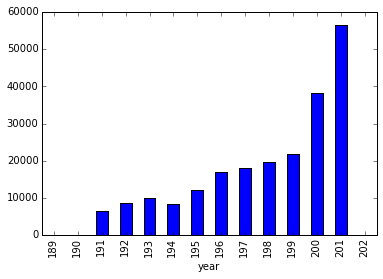

In [5]:
t = titles
t.groupby(t.year//10).size().plot('bar')


### Use groupby() to plot the number of "Hamlet" films made each decade.

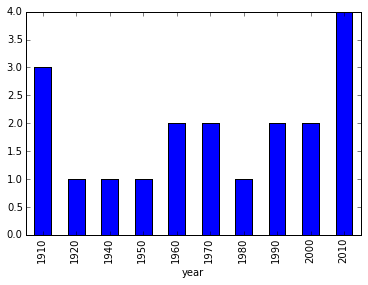

In [8]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year//10*10).size().plot('bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [13]:
c = cast
c = c[c.n==1]
c = c[c.year//10 == 195]
c.groupby(['year','type']).size()

year  type   
1950  actor      605
      actress    278
1951  actor      636
      actress    273
1952  actor      592
      actress    284
1953  actor      638
      actress    294
1954  actor      629
      actress    298
1955  actor      614
      actress    271
1956  actor      621
      actress    294
1957  actor      711
      actress    290
1958  actor      700
      actress    278
1959  actor      686
      actress    299
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [14]:
c = cast
c = c[c.year//10*10 == 1950]
c = c[(c.n>=1) & (c.n<=5)]
c.groupby(['n','type']).size()

n  type   
1  actor      6432
   actress    2859
2  actor      4432
   actress    4437
3  actor      5458
   actress    3052
4  actor      5443
   actress    2780
5  actor      5471
   actress    2474
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [19]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort_values('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15
2006,50
2016,NaN


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [24]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year','title']).size()
g[g>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [27]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g>=2].order()

C:\Users\Ruiye\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64